In [1]:
# The data_dir variable is the only input allowed to your code. 
# Do not modify any file names in the image directory.
data_dir = "./MASI_pets"
# Add your code in the cells.

In [2]:
import os, cv2
import pandas as pd

# Task 1 : Scan the image files to gather image meta data.

In [3]:
#Initial dictionary representation 
keyList = ["Name", "Dims", "Size", "AspectRatio", "PetName", "OwnerInitials"]
data = {k:[] for k in keyList}
data

{'Name': [],
 'Dims': [],
 'Size': [],
 'AspectRatio': [],
 'PetName': [],
 'OwnerInitials': []}

In [4]:
#Scan directory and get metadata
with os.scandir(data_dir) as images:
    for image in images:
        name = image.name
        data["Name"].append(name)
        name = image.name.split(".")
        names = name[0].split("_")
        data["PetName"].append(names[0])
        data["OwnerInitials"].append(names[1]) 
        im = cv2.imread(image.path)
        dim = im.shape
        data["Dims"].append(dim) 
        data["Size"].append(im.size)
        data["AspectRatio"].append(dim[0]/dim[1])

In [5]:
df = pd.DataFrame.from_dict(data)

In [6]:
#Sort the table largest to smallest by image size, breaking ties by alphabetical pet names (A - Z).
df = df.sort_values(["Size", "PetName"], ascending=[False, True])

In [7]:
#Print 
df

,Name,Dims,Size,AspectRatio,PetName,OwnerInitials
1,Yasha_SR.jpg,"(4608, 3456, 3)",47775744,1.333333,Yasha,SR
12,Arthur_FR.jpg,"(4032, 3024, 3)",36578304,1.333333,Arthur,FR
0,August_XY.jpg,"(4032, 3024, 3)",36578304,1.333333,August,XY
5,Disney_XY.jpg,"(3024, 4032, 3)",36578304,0.750000,Disney,XY
7,Francie_CK.jpg,"(4032, 3024, 3)",36578304,1.333333,Francie,CK
8,Hamilton_CK.png,"(4032, 3024, 3)",36578304,1.333333,Hamilton,CK
3,Mango_LC.jpg,"(4032, 3024, 3)",36578304,1.333333,Mango,LC
6,Ruby and Buddy_MK.jpg,"(4032, 3024, 3)",36578304,1.333333,Ruby and Buddy,MK
2,Xiaomi_CG.jpeg,"(4032, 3024, 3)",36578304,1.333333,Xiaomi,CG
17,Ziggy_NN.jpg,"(4032, 3024, 3)",36578304,1.333333,Ziggy,NN


# Task 2: Look at the meta data to assess differences in the dataset.

Text(0.5, 0, 'Size(# of pixels)')

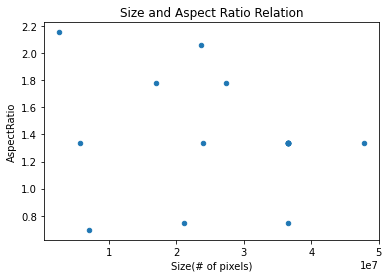

In [8]:
#Plot scatter of image size and aspect ratio 
pl = df.plot.scatter(x = "Size", y = "AspectRatio", title = "Size and Aspect Ratio Relation")
pl.set_xlabel("Size(# of pixels)")

# Task 3: Look at the image data to check quality.
5 columns, images should be sorted alphabetically by the owner's initials (A - Z), starting in the top left corner of the grid, break ties by pet names, also sorted alphabetically (A - Z).

In [14]:
import matplotlib.pyplot as plt
import math 

In [15]:
n = df.shape[0]
columns = 5 
rows = math.ceil(n/5)
rows

4

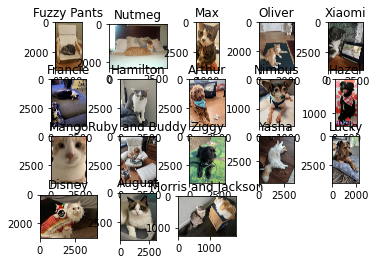

In [17]:
num = 1
fig=plt.figure()
for i, r in df.sort_values(["OwnerInitials", "PetName"], ascending=[False, True]).iterrows():
    img = cv2.imread(data_dir + "/" + r["Name"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(rows,columns,num)
    plt.imshow(img)
    plt.title(r["PetName"])
    num += 1 
plt.show()